In [20]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload
from scipy.optimize import minimize

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

from esc_psf.math_module import xp, xcipy, ensure_np_array
from esc_psf import utils, wfe, props
import esc_psf.esc_fraunhofer as esc

wavelength_c = 650e-9

In [24]:
M = esc.single()

wl = 500e-9
diam = 10e-3
distance = 100e-3
npix = M.npix
N = 2048

wf = utils.pad_or_crop(M.APERTURE, N)

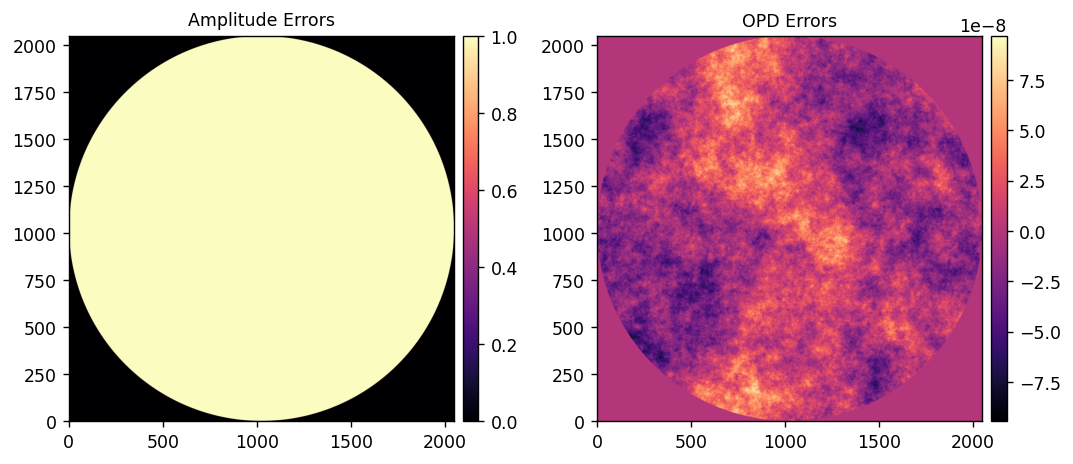

In [27]:
slope = 2.5
opd_rms = 25*u.nm
amp_rms = 0.0
wfe_amp, wfe_opd = wfe.generate_wfe(
    npix=N, 
    oversample=1,
    wavelength=M.wavelength_c,
    opd_index=slope, 
    amp_index=slope,
    opd_rms=opd_rms, 
    amp_rms=amp_rms,
    remove_amp_modes=12,
    remove_opd_modes=3,
    opd_seed=1234, 
    amp_seed=12345,
)

WFE = wfe_amp * xp.exp(1j * 2*xp.pi * wfe_opd/wl)
# WFE = utils.pad_or_crop( wfe_amp * xp.exp(1j * 2*xp.pi * wfe_opd/wl), N)

utils.imshow(
    [wfe_amp, wfe_opd], 
    titles=['Amplitude Errors', 'OPD Errors'],
)

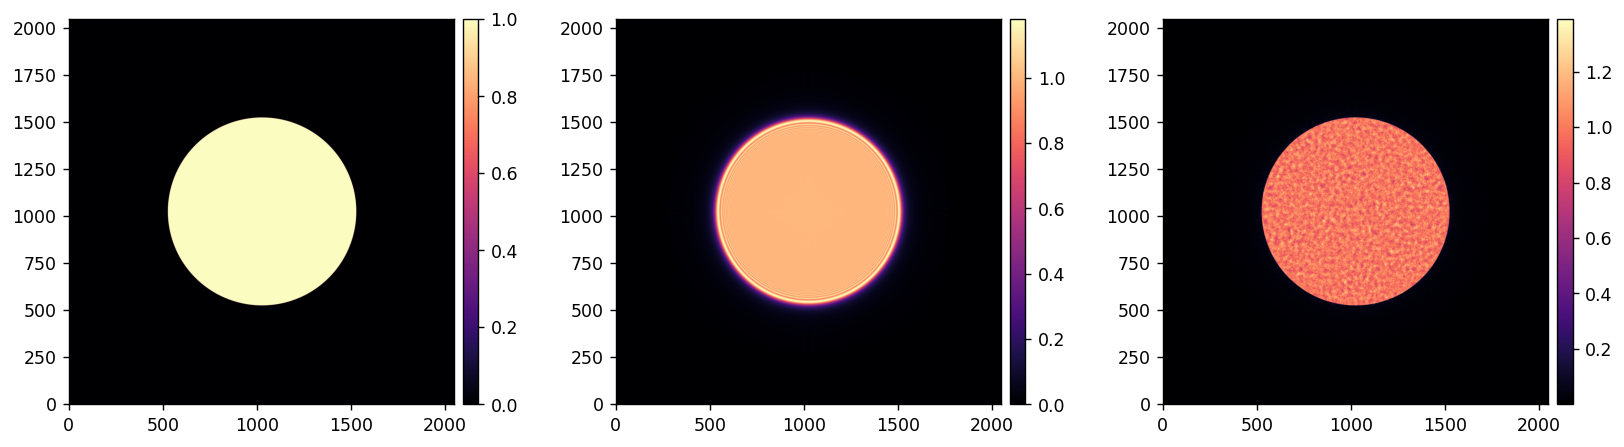

In [ ]:
prop_wf = props.ang_spec(wf, wl, distance, diam/npix)
prop_wf *= WFE

back_wf = props.ang_spec(prop_wf, wl, -distance, diam/npix)

utils.imshow(
    [wf, xp.abs(prop_wf), xp.abs(back_wf)]
)

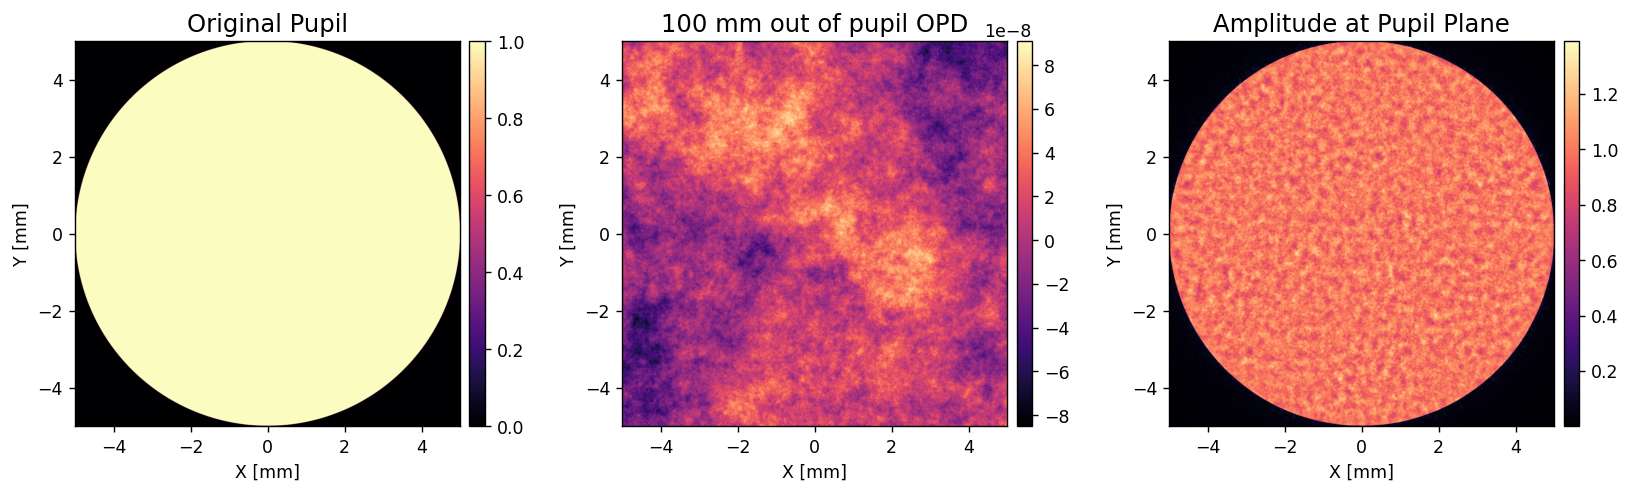

In [36]:
utils.imshow(
    [wf, wfe_opd, xp.abs(back_wf)],
    titles=['Original Pupil', '100 mm out of pupil OPD', 'Amplitude at Pupil Plane'],
    title_fzs=[14]*3,
    npix=[npix]*3,
    pxscls=[1000*diam/npix]*3,
    xlabels=['X [mm]']*3, 
    ylabels=['Y [mm]']*3, 

)